<a href="https://colab.research.google.com/github/invinciblebansal/DSDL-2022/blob/main/Heart_KNN%2BLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing important libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading dataset using pandas

It contains 918 rows × 12 columns

In [3]:
df=pd.read_csv('/content/heart.csv')

#Data Preprocessing


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Mapping the ordinal data to numeric data

In [5]:
dataMapping1={
    "M":1,
    "F":0
}
dataMapping2={
    "Flat":1,
    "Up":2,
    "Down":3
}
dataMapping3={
    "Normal":1,
    "ST":2,
    "LVH":3
}
dataMapping4={
    "ATA":1,
    "NAP":2,
    "ASY":3,
    "TA":4
}
dataMapping5={
    "N":0,
    "Y":1
}

In [6]:
df["Sex"]=df["Sex"].map(dataMapping1)
df["ST_Slope"]=df["ST_Slope"].map(dataMapping2)
df["RestingECG"]=df["RestingECG"].map(dataMapping3)
df["ChestPainType"]=df["ChestPainType"].map(dataMapping4)
df["ExerciseAngina"]=df["ExerciseAngina"].map(dataMapping5)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,3,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,1,132,0,1.2,1,1
914,68,1,3,144,193,1,1,141,0,3.4,1,1
915,57,1,3,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,3,174,0,0.0,1,1


Standard Scaling data for accurate training

In [7]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(df.drop('HeartDisease',axis=1))
scaled_features= scaler.transform(df.drop('HeartDisease',axis=1))


In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,-1.705573,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,0.699073
1,-0.478484,-1.938163,-0.530992,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,-0.917423
2,-1.751359,0.515952,-1.705573,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,0.699073
3,-0.584556,-1.938163,0.643588,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,-0.917423
4,0.051881,0.515952,-0.530992,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,0.699073


checking duplicate itrations (rows & columns)


In [9]:
df[df.index.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


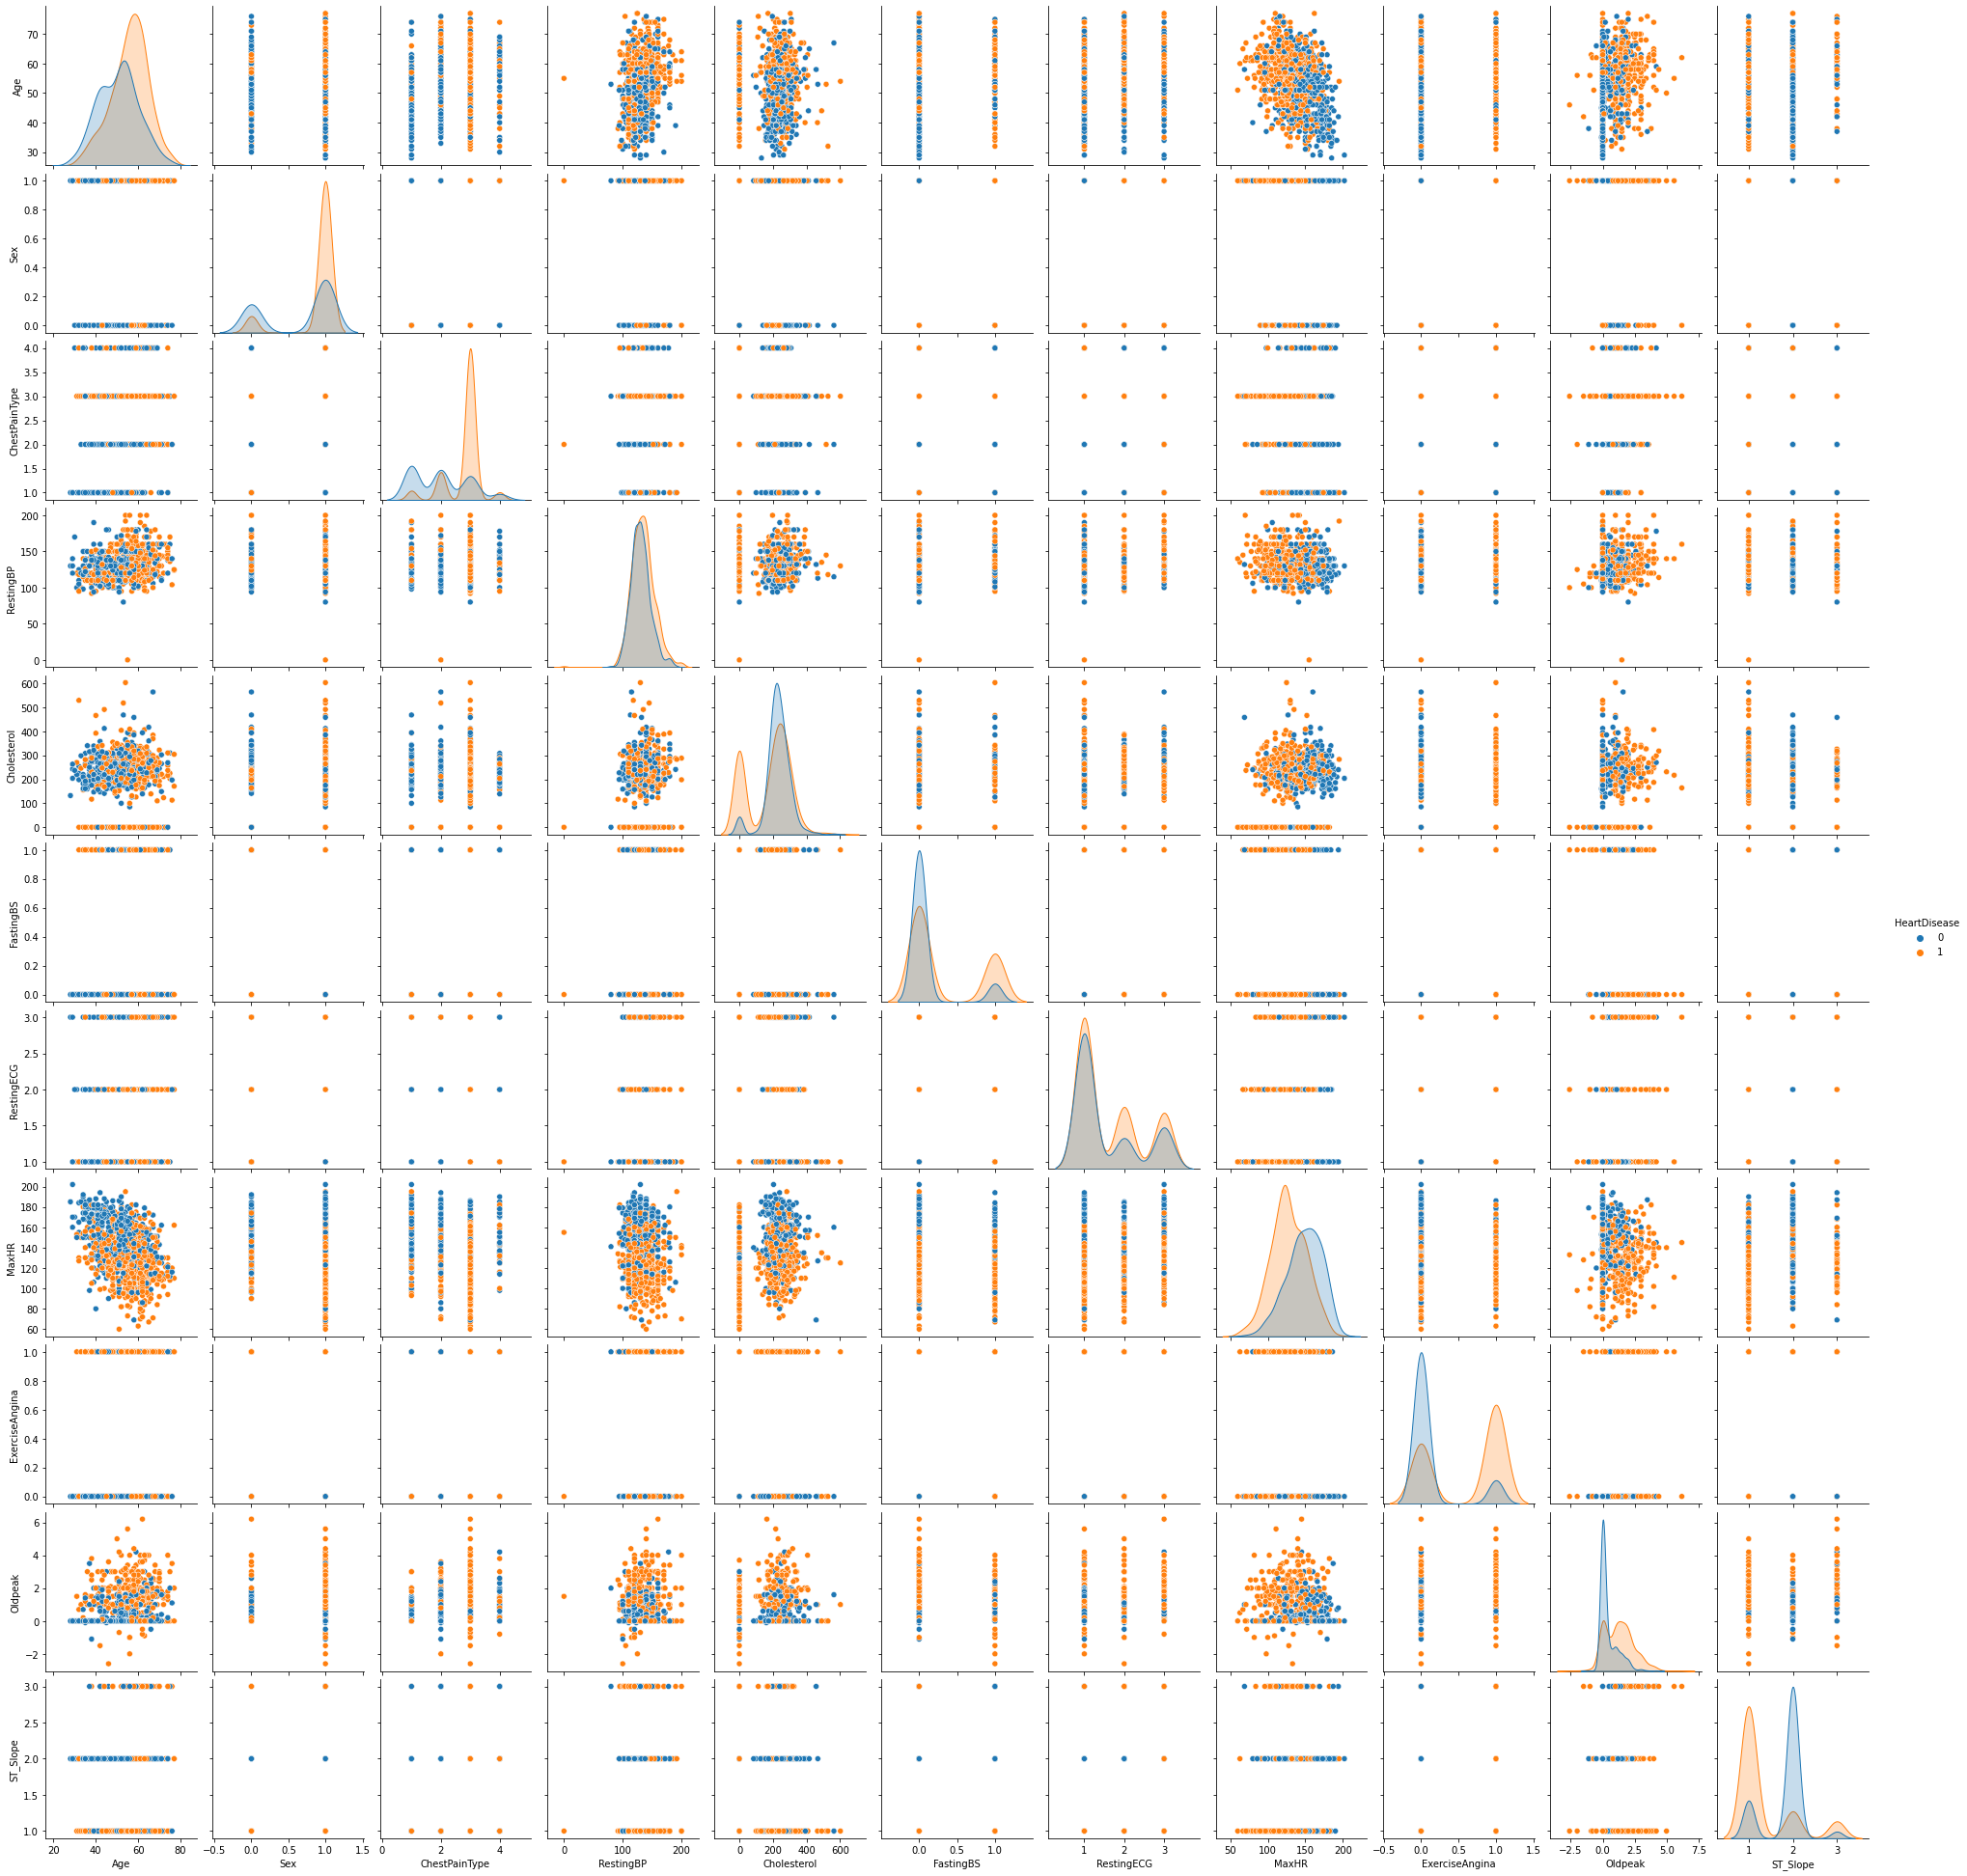

In [10]:
sns.pairplot(df,hue='HeartDisease')

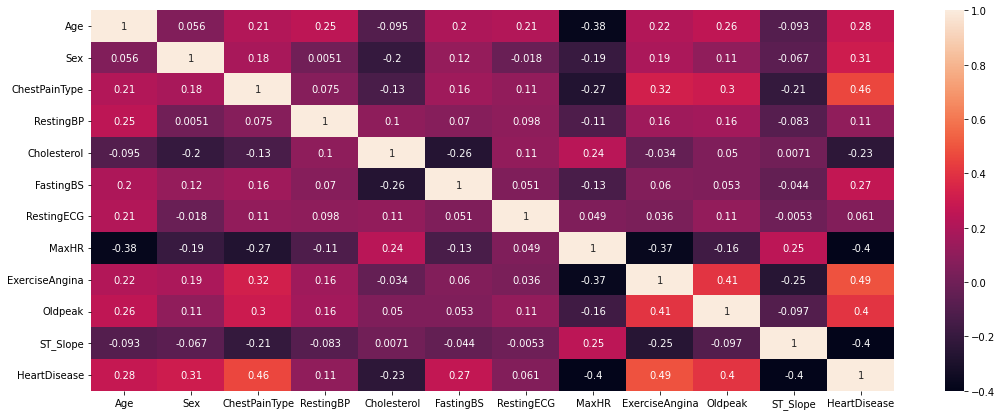

In [11]:
plt.figure(figsize=[18,7])

sns.heatmap(df.corr(),annot=True)
plt.show()

Splitting the test train data in 3:7 ratio


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['HeartDisease'],
                                                    test_size=0.30)

#KNN Classifier


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[107  22]
 [ 23 124]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       129
           1       0.85      0.84      0.85       147

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [15]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['HeartDisease'],cv=10)
    error_rate.append(1-score.mean())

In [16]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

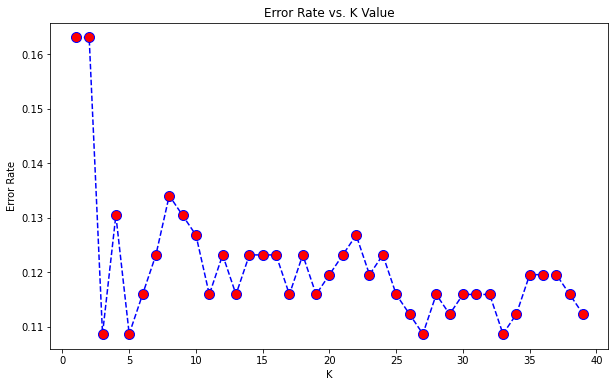

In [17]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[107  22]
 [ 23 124]]


              precision    recall  f1-score   support

           0       0.82      0.83      0.83       129
           1       0.85      0.84      0.85       147

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [19]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[116  13]
 [ 22 125]]


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       129
           1       0.91      0.85      0.88       147

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



In [20]:

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[113  16]
 [ 14 133]]


              precision    recall  f1-score   support

           0       0.89      0.88      0.88       129
           1       0.89      0.90      0.90       147

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



#Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [20]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [21]:
logreg.predict_proba(X_test)[:,0]

array([0.08328198, 0.14683698, 0.11327839, 0.0249892 , 0.05619238,
       0.10864725, 0.89726531, 0.12289961, 0.64759488, 0.23018529,
       0.07763925, 0.50527997, 0.90679964, 0.40029555, 0.20139681,
       0.95659775, 0.34676516, 0.01257972, 0.07545935, 0.31774482,
       0.10610734, 0.73450037, 0.62783273, 0.49256631, 0.03898044,
       0.09975325, 0.40528953, 0.34617125, 0.05719709, 0.32778642,
       0.58051716, 0.19058241, 0.39605913, 0.8584265 , 0.03987883,
       0.19112257, 0.9332511 , 0.74546067, 0.10271169, 0.8400332 ,
       0.47518169, 0.52644806, 0.77112803, 0.0494142 , 0.15907407,
       0.98046631, 0.07458119, 0.03988301, 0.02815112, 0.08674767,
       0.05812071, 0.92464158, 0.18471907, 0.00432606, 0.88336703,
       0.98197515, 0.64355568, 0.1350879 , 0.01153654, 0.91223106,
       0.94765588, 0.07050112, 0.79200349, 0.92828861, 0.47134245,
       0.93470784, 0.048471  , 0.91131236, 0.37336639, 0.9881868 ,
       0.06531041, 0.77747512, 0.07009471, 0.22142266, 0.04543

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8623


# summary
#         accuracy by KNN=89%
 #        accuracy by Logistic Regression=86%